## FEATURE PROCESSING
In this section we will process the features of the dataset. This includes doing any feature engineering and
transformations being applied to the data. All of this is done after loading in the cleaned version of the data.


In [3]:
import pandas as pd
clean_path = 'credit_card_transactions_clean.csv'
df = pd.read_csv(clean_path)
# print("Loaded", df.shape, "rows × columns")
df.head(20)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_outlier
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,...,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,0
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,...,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,0
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,0
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,0
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,...,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,0


### SEPERATING DATE TIME 
For each transction-date-time we will seperate into hour, weekday, and month
This will help later in anomaly detection and clustering user behaviour based on time of day, day of week, and month.

In [4]:
df['trans_dt'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour']     = df['trans_dt'].dt.hour
df['weekday']  = df['trans_dt'].dt.weekday
df['month']    = df['trans_dt'].dt.month

In [5]:
df.drop(columns=['trans_date_trans_time'], inplace=True)
df.head(10)

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_outlier,trans_dt,hour,weekday,month
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,2019-01-01 00:00:18,0,1,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,2019-01-01 00:00:44,0,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,2019-01-01 00:00:51,0,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,2019-01-01 00:01:16,0,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,2019-01-01 00:03:06,0,1,1
5,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,...,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,0,2019-01-01 00:04:08,0,1,1
6,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,...,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,0,2019-01-01 00:04:42,0,1,1
7,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,...,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,0,2019-01-01 00:05:08,0,1,1
8,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,...,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,0,2019-01-01 00:05:18,0,1,1
9,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,...,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,0,2019-01-01 00:06:01,0,1,1


# EDA/FEATURE ENGINEERING FOR GUIDING QUESTION 1: 

## How to build  a reliable time series forecasting model to predict future credit card spending, at both individual and aggregate levels, based on historical behaviours?

Since there are multiple transactions the intuition is to see how many unique cards across the total numbers of transactions

In [6]:
# How many unique cards?
n_cards = df['cc_num'].nunique()

# How many total rows?
n_rows = len(df)

print(f"{n_cards:,} unique cards across {n_rows:,} transactions "
      f"(≈ {n_rows/n_cards:.1f} txns/card on average)")

983 unique cards across 1,296,675 transactions (≈ 1319.1 txns/card on average)


## Interpret the “Txns per Card” figure
983 unique cards means we truly have about a thousand distinct “users” (cards).

1.3 million transactions spread across them gives an average of 1,319 transactions per card.

In reality, some cards will be used far more often than others—so the distribution of transactions per card is almost certainly skewed (long right tail).



## Transactions Per Card

In [7]:
txns_per_card = df.groupby('cc_num')['amt'].count().rename('txn_count')
print(txns_per_card)
txns_per_card.describe().apply(lambda x: f"{x:.0f}")

cc_num
60416207185            1518
60422928733            1531
60423098130             510
60427851591             528
60487002085             496
                       ... 
4958589671582726883    1476
4973530368125489546    1040
4980323467523543940     532
4989847570577635369    1007
4992346398065154184    2059
Name: txn_count, Length: 983, dtype: int64


count     983
mean     1319
std       812
min         7
25%       525
50%      1054
75%      2025
max      3123
Name: txn_count, dtype: object

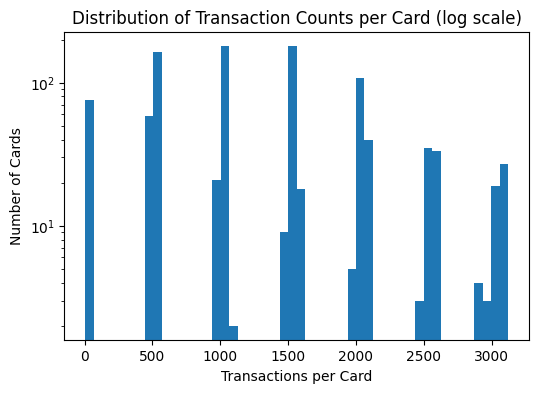

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(txns_per_card, bins=50, log=True)
plt.xlabel('Transactions per Card')
plt.ylabel('Number of Cards')
plt.title('Distribution of Transaction Counts per Card (log scale)')
plt.show()

Heavy right‐skew

Most cards fall into the 500–2 000 transactions range (the tallest bars).
A small number of cards have over 2 500 txns, stretching the tail out to ~3 200.
On the log-y axis you can still see bins with only 10–20 cards up in the 2 500–3 000 range, whereas the peak bins contain 100–200 cards.

Wide variation: 
The 25th/75th percentile range (from ~740 to ~1 850 txns) covers most cards, but the maximum (≳3 000) shows a handful of “power” users well above that.
Why the log scale helps
Without it, the small‐count bins at the high end would be nearly invisible beside the ~100-card peak bins.

### TARGET ENCODING 

Turn the segments into features
- target encode the segments 0 = light, 1 = medium, 2 = heavy
- Forecasting: Heavy users contribute most of the volume; you may need separate forecasting models or seasonality parameters for heavy‐user cohorts.

Feature: The segment code (0/1/2) can be an exogenous regressor in Prophet/ARIMA or a feature in per‐card RNNs

light user has <500 transactions>
medium user has 500 - 1000 
whole dataset --> Split into train , test  , and oot
askt gpt what is data lleakage and why cant we encode before splitting?

In [29]:
per_card = pd.DataFrame({'txn_count': txns_per_card, 'segment': segments})
per_card['seg_code'] = per_card['segment'].map({'light':0,'medium':1,'heavy':2})
df = df.join(per_card[['segment','seg_code']], on='cc_num')
df.head(10)



NameError: name 'segments' is not defined

In [9]:
per_card = (
  df.groupby('cc_num')
    .agg(
      txn_count    = ('amt','count'),
      total_spend  = ('amt','sum'),
      mean_spend   = ('amt','mean'),
      std_spend    = ('amt','std'),
      first_txn    = ('trans_dt','min'),
      last_txn     = ('trans_dt','max'),
      fraud_rate   = ('is_fraud','mean')
    )
    .fillna(0)
    .assign(days_active = lambda d: (d['last_txn'] - d['first_txn']).dt.days + 1,
            spend_per_day = lambda d: d['total_spend'] / d['days_active'])
)


In [10]:
per_card.head(20)

,txn_count,total_spend,mean_spend,std_spend,first_txn,last_txn,fraud_rate,days_active,spend_per_day
cc_num,,,,,,,,,
60416207185,1518,85043.47,56.023366,122.632635,2019-01-01 12:47:15,2020-06-21 08:54:21,0.005929,537,158.367728
60422928733,1531,105640.20,69.000784,102.681962,2019-01-03 18:38:26,2020-06-21 09:19:28,0.007838,535,197.458318
60423098130,510,58673.63,115.046333,1202.988005,2019-01-01 06:48:36,2020-06-19 01:14:31,0.019608,535,109.670336
60427851591,528,59129.61,111.987898,143.310653,2019-01-01 07:36:27,2020-06-19 13:06:04,0.026515,536,110.316437
60487002085,496,25160.11,50.726028,65.843969,2019-01-06 03:23:55,2020-06-20 15:44:36,0.000000,532,47.293440
60490596305,1010,73531.44,72.803406,127.357228,2019-01-01 12:31:09,2020-06-20 22:56:42,0.009901,537,136.930056
60495593109,518,29523.69,56.995541,65.346978,2019-01-01 00:39:43,2020-06-21 03:17:02,0.000000,538,54.876747
501802953619,1559,105725.56,67.816267,198.876122,2019-01-01 03:12:06,2020-06-21 09:08:01,0.004490,538,196.515911
501818133297,8,4946.54,618.317500,420.597504,2020-04-24 22:09:30,2020-04-25 23:21:53,1.000000,2,2473.270000


### Category-Mix EDA

Build a per-card x category spend matrix

In [13]:
cat_spend = (
    df
      .groupby(['cc_num','category'])    # group every transaction by card and category
      ['amt']                            # pick the amount column
      .sum()                             # sum dollars per (card,category)
      .unstack(fill_value=0)            # pivot categories into columns, missing → 0
      .add_prefix('spend_')              # rename columns like 'spend_grocery_pos'
)

cat_spend.head(20)

category,spend_entertainment,spend_food_dining,spend_gas_transport,spend_grocery_net,spend_grocery_pos,spend_health_fitness,spend_home,spend_kids_pets,spend_misc_net,spend_misc_pos,spend_personal_care,spend_shopping_net,spend_shopping_pos,spend_travel
cc_num,,,,,,,,,,,,,,
60416207185,5327.22,2353.95,13221.64,2670.81,14646.56,4241.94,7604.69,6671.92,3020.70,4838.97,5629.21,3515.72,10893.96,406.18
60422928733,6857.47,9870.48,10121.71,2407.72,14740.06,4687.39,10213.69,11821.96,4037.81,6038.31,6036.51,9475.63,8832.35,499.11
60423098130,2290.18,2248.67,3641.47,37.27,5335.87,1708.76,1854.30,2741.89,1471.80,1141.46,2061.65,5262.95,1629.83,27247.53
60427851591,2985.29,1528.00,2081.52,1142.46,7818.85,2550.97,4798.08,2242.31,4213.20,1635.23,1553.62,9500.07,6355.39,10724.62
60487002085,1495.84,1884.46,3637.95,1009.63,4028.14,2270.87,2191.04,2641.24,192.06,2900.79,817.60,557.37,1444.32,88.80
60490596305,3704.95,2757.69,9378.18,221.23,14599.75,3057.31,3859.11,5000.62,6993.86,4358.24,3625.09,9153.38,6659.24,162.79
60495593109,2557.15,3082.13,3489.06,584.99,3783.84,1027.40,4210.16,3479.41,578.44,1699.73,2429.19,1194.44,1322.20,85.55
501802953619,7259.21,3974.98,13868.79,645.63,19472.30,5720.07,5550.21,8136.84,2637.64,6018.30,6186.56,6524.46,9188.69,10541.88
501818133297,0.00,0.00,7.90,0.00,944.27,0.00,0.00,0.00,0.00,0.00,0.00,3994.37,0.00,0.00


Above we are creating a wide table where each row is a cc_num and each column (ex: spend_grocery_pos) 

In [14]:
frac_spend = (
    cat_spend
      .div(cat_spend.sum(axis=1), axis=0)  # divide each row by its row‐sum
      .add_prefix('frac_')                 # rename to 'frac_spend_grocery_pos', etc.
)

Above we are normalizing the spending for each row compute what fraction of its total spend went into each category. Fractions are comparable across light vs. heavy users. A $200 grocery spend could mean something very different for a card with $1,000 total vs. $100,000 total.

Suppose you have this `cat_spend` for two cards:

| cc_num | spend_grocery | spend_shopping | spend_travel |
|:------:|-------------:|--------------:|-------------:|
| 12345  |         5000 |          3000 |          750 |
| 67890  |          120 |           400 |         1500 |

- **Card 12345** total spend = \$5 000 + \$3 000 + \$750 = **\$8 750**  
- **Card 67890** total spend = \$120 + \$400 + \$1 500 = **\$2 020**

We want to convert these raw dollar amounts into **fractions** of each card’s total spend:

For **card 12345**:  
- `frac_spend_grocery` = 5 000 ÷ 8 750 = **0.571**  
- `frac_spend_shopping` = 3 000 ÷ 8 750 = **0.343**  
- `frac_spend_travel`   =   750 ÷ 8 750 = **0.086**  

For **card 67890**:  
- `frac_spend_grocery` = 120 ÷ 2 020 ≈ **0.059**  
- `frac_spend_shopping` = 400 ÷ 2 020 ≈ **0.198**  
- `frac_spend_travel`   = 1 500 ÷ 2 020 ≈ **0.743**  

The code below performs exactly this transformation:

```python
frac_spend = (
    cat_spend
      .div(cat_spend.sum(axis=1), axis=0)  # Divide each row by its total spend
      .add_prefix('frac_')                 # Rename columns to 'frac_spend_<category>'
)

#### The Use Case:
These fraction features capture each card’s spend preferences (e.g. “57% on groceries”) which can be used for clustering or as regressors in time-series models.

In [15]:
frac_spend.head(20)


category,frac_spend_entertainment,frac_spend_food_dining,frac_spend_gas_transport,frac_spend_grocery_net,frac_spend_grocery_pos,frac_spend_health_fitness,frac_spend_home,frac_spend_kids_pets,frac_spend_misc_net,frac_spend_misc_pos,frac_spend_personal_care,frac_spend_shopping_net,frac_spend_shopping_pos,frac_spend_travel
cc_num,,,,,,,,,,,,,,
60416207185,0.062641,0.027679,0.155469,0.031405,0.172224,0.049880,0.089421,0.078453,0.035519,0.056900,0.066192,0.041340,0.128099,0.004776
60422928733,0.064913,0.093435,0.095813,0.022792,0.139531,0.044371,0.096684,0.111908,0.038222,0.057159,0.057142,0.089697,0.083608,0.004725
60423098130,0.039033,0.038325,0.062063,0.000635,0.090942,0.029123,0.031604,0.046731,0.025085,0.019454,0.035138,0.089699,0.027778,0.464391
60427851591,0.050487,0.025842,0.035203,0.019321,0.132232,0.043142,0.081145,0.037922,0.071254,0.027655,0.026275,0.160665,0.107482,0.181375
60487002085,0.059453,0.074899,0.144592,0.040128,0.160100,0.090257,0.087084,0.104977,0.007634,0.115293,0.032496,0.022153,0.057405,0.003529
60490596305,0.050386,0.037504,0.127540,0.003009,0.198551,0.041578,0.052482,0.068007,0.095114,0.059270,0.049300,0.124483,0.090563,0.002214
60495593109,0.086613,0.104395,0.118178,0.019814,0.128163,0.034799,0.142603,0.117851,0.019592,0.057572,0.082279,0.040457,0.044784,0.002898
501802953619,0.068661,0.037597,0.131177,0.006107,0.184178,0.054103,0.052496,0.076962,0.024948,0.056924,0.058515,0.061711,0.086911,0.099710
501818133297,0.000000,0.000000,0.001597,0.000000,0.190895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.807508,0.000000,0.000000


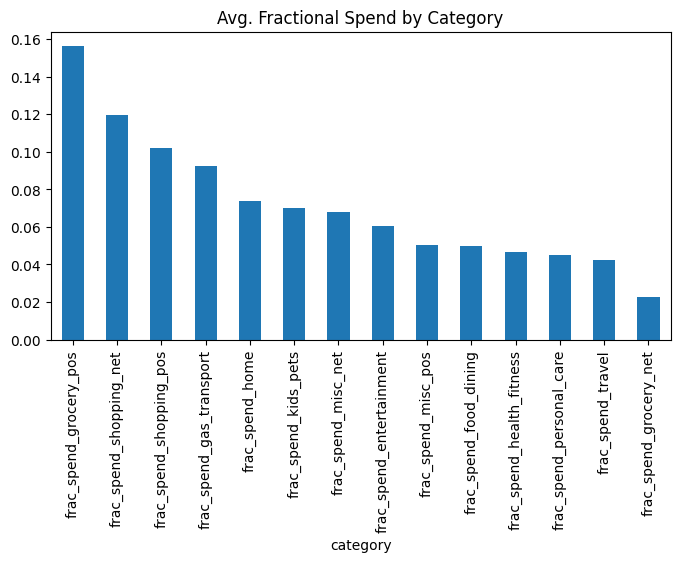

In [21]:
avg_frac = frac_spend.mean().sort_values(ascending=False)
avg_frac.plot(kind='bar', figsize=(8,4))
plt.title('Avg. Fractional Spend by Category')
plt.show()


### Merge these features dataframes back into the original data frame as this will serve as our Feature Store

In [16]:
# First join raw spend totals onto per_card summary:
per_card = per_card.join(cat_spend, how='left')
# Then join fractional spend:
per_card = per_card.join(frac_spend, how='left')

# Finally, if you really want everything on the transaction-level df:
df = df.join(cat_spend,    on='cc_num')
df = df.join(frac_spend,   on='cc_num')

In [17]:
df.head(20)

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,frac_spend_grocery_pos,frac_spend_health_fitness,frac_spend_home,frac_spend_kids_pets,frac_spend_misc_net,frac_spend_misc_pos,frac_spend_personal_care,frac_spend_shopping_net,frac_spend_shopping_pos,frac_spend_travel
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,0.226508,0.036376,0.074360,0.063637,0.044163,0.060127,0.045856,0.111106,0.140807,0.006727
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,0.151782,0.055977,0.083859,0.071722,0.065255,0.086249,0.067386,0.073231,0.074419,0.005969
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,0.147493,0.057000,0.072415,0.100396,0.018163,0.049092,0.052939,0.051872,0.092219,0.041519
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,0.202514,0.071896,0.057784,0.049193,0.081060,0.007340,0.067794,0.198596,0.032478,0.041285
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,0.128388,0.060061,0.096862,0.048869,0.023727,0.026842,0.025534,0.078140,0.111114,0.219294
5,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,...,0.183404,0.050384,0.076122,0.055997,0.089503,0.014081,0.064010,0.142472,0.058048,0.008224
6,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,...,0.223475,0.041293,0.058892,0.056458,0.053422,0.063247,0.048640,0.135974,0.128345,0.005201
7,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,...,0.099930,0.031405,0.097592,0.104707,0.061626,0.054488,0.052745,0.086025,0.106462,0.005111
8,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,...,0.178559,0.054497,0.089599,0.061859,0.090055,0.034650,0.062888,0.124284,0.087102,0.003612
9,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,...,0.227996,0.040180,0.068514,0.063044,0.046779,0.060010,0.052704,0.114364,0.144767,0.001191


* Every static feature will be present on every row, however this allows every row to have the same set of features so no extra lookups. The trade off here is memory.

## MERCHANT ANALYSIS

## Why Merchant-Level Features Matter

1. **Capture Granular Seasonality**  
   - Different merchants exhibit distinct demand cycles (e.g., grocery stores peak around holidays, gas stations during summer travel).  
   - By encoding top merchant activity, our forecasting model can learn these merchant-specific spikes and troughs and factor them into its predictions.

2. **Improve Aggregate Forecast Accuracy**  
   - On the **global daily series**, including daily counts or spends at the most active merchants as **exogenous regressors** (Prophet’s `add_regressor()` or ARIMA’s `exog=`) helps the model adjust to real-world events—like major store sales or supply chain interruptions.

3. **Enhance Personalized, Per-Card Forecasts**  
   - For each card’s own history, knowing **which merchants** that card frequents most provides a tailored signal.  
   - A model for a “grocery-heavy” card will behave differently (holiday grocery rush) than one used primarily at travel sites (vacation season spikes).

4. **Balance Coverage vs. Complexity**  
   - Flagging too many merchants yields high-dimensional, sparse data—slowing training and risking overfit.  
   - Creating a flag for the top N merchants and then each row would have a 0 or 1 if it is part of that top N feature flag or not
   - This will lead to a lot of sparse rows where there are a lot of zeros
   - Selecting the smallest set of merchants that covers the bulk of transactions via an **“elbow method”** ensures we capture the lion’s share of merchant-driven seasonality without unnecessary complexity.



* Use Elbow method based on plot to select an N which has best coverage with low addition of comlexity

### Intuitive Benefits of `is_top_merchant`

1. **Signal Major Spending Hubs**  
   - If a large share of your transaction volume comes from those top-300 merchants, then a flag `is_top_merchant = 1` tells the model “this transaction (or this day) occurred at a high-traffic store.”  
   - Days with many `is_top_merchant = 1` transactions often align with large-scale promotions, holidays, or weekend rushes.

2. **Dimensionality Control**  
   - Instead of creating 300 sparse one-hot columns, a single boolean flag condenses the “important merchant” signal into one dimension, avoiding overfitting and speeding up training.

3. **Model-Agnostic Utility**  
   - **Clustering:** Cards with a high fraction of `is_top_merchant` transactions cluster together—these are “chain-store loyalists.”  
   - **Tree Models (XGBoost, Random Forest):** A split on `is_top_merchant` quickly separates high-volume merchant days from niche-merchant days.  
   - **Linear Models & Time-Series Regressions:** As a binary regressor, it boosts or penalizes forecasts on days dominated by flagship stores.

---

### Worked Example

Suppose we have two cards over two days:

| cc_num | date       | merchant       | amt  | is_top_merchant |
|:------:|:-----------|:---------------|-----:|:---------------:|
| A      | 2020-06-01 | GroceryChainX  |  200 |               1 |
| A      | 2020-06-02 | Local Bodega   |   50 |               0 |
| B      | 2020-06-01 | TravelSiteY    | 1000 |               1 |
| B      | 2020-06-02 | Small Cafe Z   |   30 |               0 |

#### Aggregate Model Input (Daily Totals)

| ds          | y    | top_txn_count |
|:-----------:|-----:|--------------:|
| 2020-06-01  | 1200 |             2 |  ← two top-300 merchant transactions  
| 2020-06-02  |   80 |             0 |  ← no top-300 merchant activity  

_Prophet can learn that days with `top_txn_count = 2` tend to have higher total spend, adjusting its baseline accordingly._

#### Per-Card Model Input (Panel)

| cc_num | ds          | y    | is_top_merchant |
|:------:|:-----------:|-----:|:---------------:|
| A      | 2020-06-01  |  200 |               1 |
| A      | 2020-06-02  |   50 |               0 |
| B      | 2020-06-01  | 1000 |               1 |
| B      | 2020-06-02  |   30 |               0 |

_A per-card Prophet run can use `is_top_merchant` as an exogenous regressor; it learns that Card B’s spending jumps when it visits a top merchant._

---

### Summary

The single boolean flag **`is_top_merchant`** captures a key piece of behavioral context—**“was this transaction at one of our biggest merchants?”**—while keeping the feature matrix compact. It’s immediately useful for clustering, tree-based models, linear regressions, and time-series forecasting.  

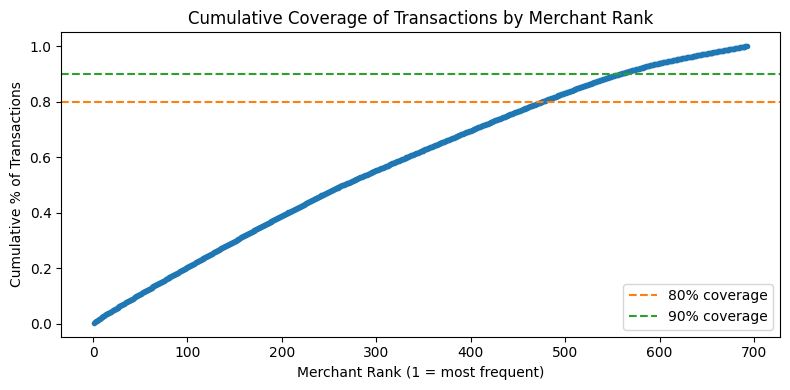

In [ ]:
#This cell shows what fraction of all transactions is covered as we include more merchants in descending order of frequency.  We’ll look for the “elbow” point where the curve flattens: beyond that rank, each additional merchant adds very little coverage.
# 5.1 Compute counts and cumulative coverage
counts = df['merchant'].value_counts()
cum_pct = counts.cumsum() / counts.sum()

# 5.1 Plot the coverage curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(range(1, len(counts)+1), cum_pct, marker='.', linewidth=1)
plt.axhline(0.80, color='C1', linestyle='--', label='80% coverage')
plt.axhline(0.90, color='C2', linestyle='--', label='90% coverage')
plt.title('Cumulative Coverage of Transactions by Merchant Rank')
plt.xlabel('Merchant Rank (1 = most frequent)')
plt.ylabel('Cumulative % of Transactions')
plt.legend()
plt.tight_layout()
plt.show()

* Based on plot decided to have N = 300 

In [24]:
#Create the Top-300 Merchant Flag
# 5.5
# 1) Extract the top-300 merchant names
top300 = counts.head(300).index.tolist()

# 2) Boolean flag on every transaction
df['is_top300_merchant'] = df['merchant'].isin(top300).astype(int)

# 3) Quick sanity‐check
print("Transactions at top-300 merchants:", df['is_top300_merchant'].sum())
print("Pct of all txns:", df['is_top300_merchant'].mean().round(4))

Transactions at top-300 merchants: 716358
Pct of all txns: 0.5525


In [ ]:
merchant_summary = (
    df.groupby('merchant')
      .agg(
        merch_txn_count = ('amt','count'),
        merch_avg_amt   = ('amt','mean'),
        #merch_fraud_rate= ('is_fraud','mean'),
      )
)

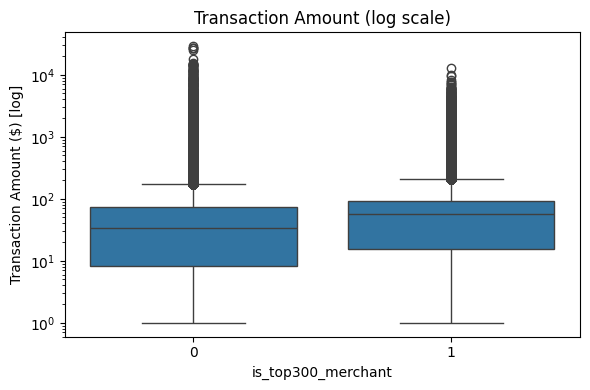

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x='is_top300_merchant', y='amt', data=df)
plt.yscale('log')
plt.title('Transaction Amount (log scale)')
plt.xlabel('is_top300_merchant')
plt.ylabel('Transaction Amount ($) [log]')
plt.tight_layout()
plt.show()


Intuitive Takeaway (Once Plotted Properly)
Median Difference: Even after adjusting for outliers/privacy, you’ll likely see that top‐300 merchants have a higher median transaction amount.

Spread: The IQR (25–75%) for top‐300 may sit at a higher dollar-range, indicating more expensive routine purchases.

Outlier Frequency: Top‐300 flags will still capture the biggest spikes, but with log‐scale or winsorization you can compare the “everyday” behavior rather than just the occasional $30 k purchase.

# Time features / Temporal 
* spending over week, month, year (season)
* export csv --> modelling (1rst step --> split the data into train 70), test(30), oot 

* prepping for prohet and arima (modelling) --> catboost , xgboost , autoencoder (anomaly detection)
-fraud =--> cluster on location or encoded (transaction count)